# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## (2) Data Loading

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/customer_segmentation.csv'
data = pd.read_csv(path)
data.head()

,CustID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2.데이터 전처리

## (1) 데이터 분할

In [5]:
# 군집화는 아래 변수들만 사용합니다.
x = data.loc[:, ['Age', 'Income', 'Score']]

## (2) 스케일링

In [6]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

# 3.클러스터링

## (1)  k-means 모델 만들기
* k값을 늘려가면서(1~20) 모델을 만들고, inertia 값을 저장합니다.
* 그래프를 통해서 최적의 k값을 결정합니다.
    * 단, k값은 3~6개 사이에서 결정하세요.
* 선정된 k값으로 모델을 생성합니다.

In [7]:
kvalues = range(3, 7)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x_s)
    inertias.append(model.inertia_)

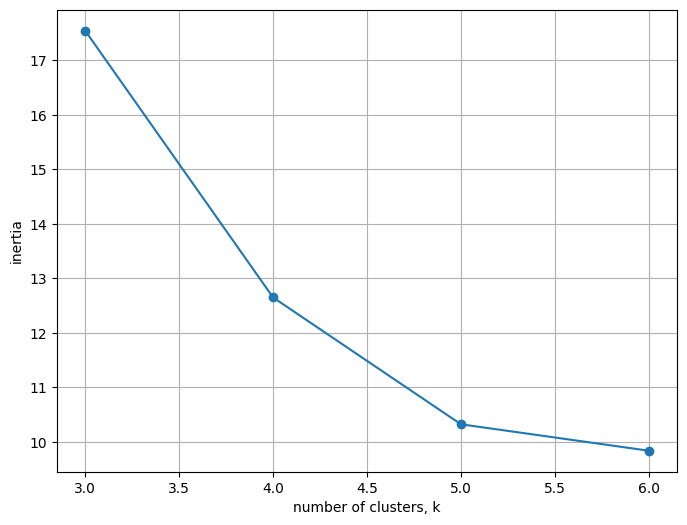

In [8]:
plt.figure(figsize = (8, 6))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

In [9]:
model = KMeans(n_clusters=5, n_init = 'auto')
model.fit(x_s)

KMeans(n_clusters=5, n_init='auto')

## (2) 데이터 군집 결과 정리
* 데이터를 군집화 하여 기존 데이터와 합치기
    * pd.concat([data, pred], axis = 1)

In [10]:
# 예측
pred = model.predict(x_s)

# 예측 결과를 데이터프레임으로 만들고
pred = pd.DataFrame(pred, columns=['predicted'])

# 원본 데이터와 합치기
result = pd.concat([data, pred], axis=1)

# 예측 결과는 카테고리 타입으로 변경
result['predicted'] = result['predicted'].astype('category')

In [11]:
result

,CustID,Gender,Age,Income,Score,predicted
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


# 4.후속 분석
* 군집별 특징을 분석해 봅시다.

## (1) 군집별 변수 비교
* 활용 가능한 차트 : sns.barplot, sns.kdeplot, sns.boxplot, mosaic

### 1) Age

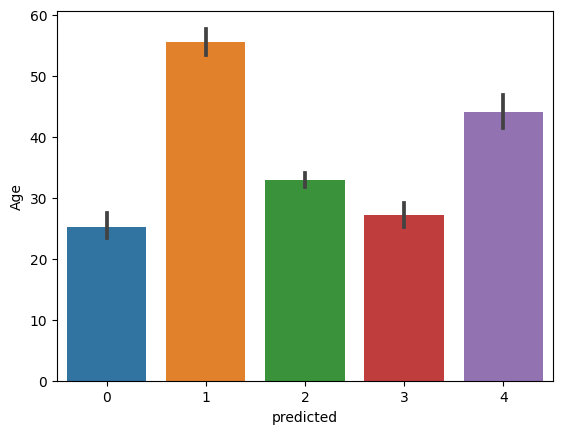

In [25]:
sns.barplot(x = 'predicted', y='Age', data = result)
plt.show()

### 2) Income

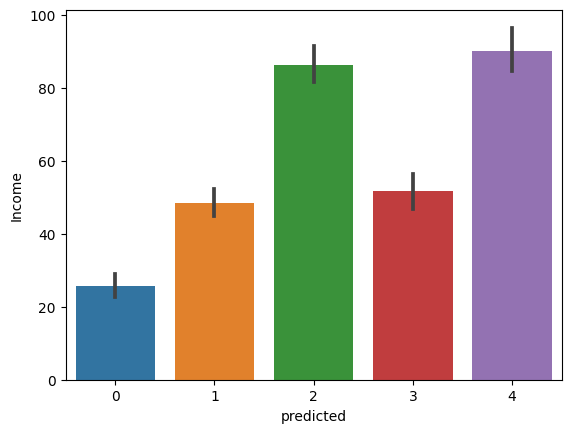

In [26]:
sns.barplot(x = 'predicted', y='Income', data = result)
plt.show()

### 3) Score

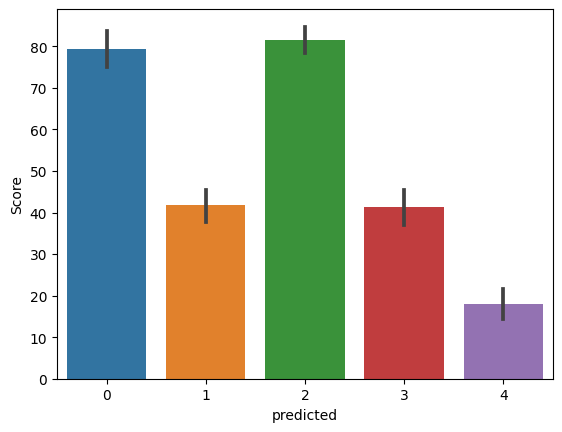

In [27]:
sns.barplot(x = 'predicted', y='Score', data = result)
plt.show()

### 4) Gender
* 모자익 플롯을 사용해 봅시다.

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

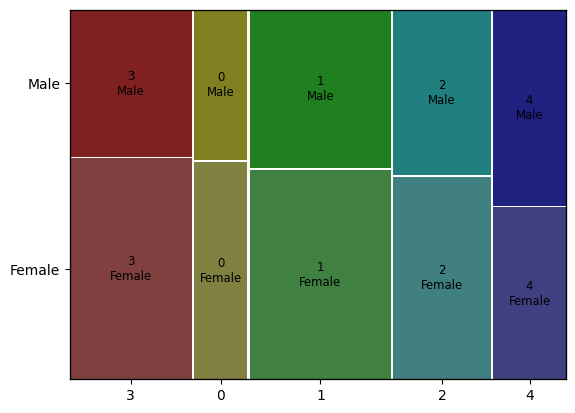

In [34]:
mosaic(result, ['predicted', 'Gender'])
plt.show()

## (2) 한꺼번에 비교하기
* sns.pairplot을 이용하여 한꺼번에 비교해 봅시다.

In [14]:
# 'Age', 'Income', 'Score', 'pred'만 추출
temp = result[['Age', 'Income', 'Score', 'predicted']]

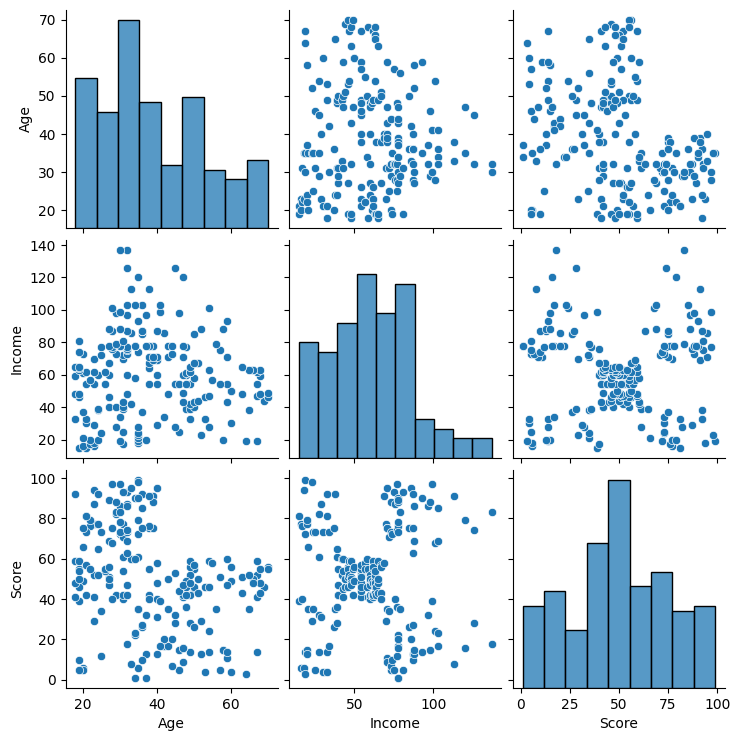

In [15]:
sns.pairplot(temp)
plt.show()

## (3) 각 군집별 특징을 정리해 봅시다.
* 각 군집의 특징(다른 군집과 차별화 되는 요소)을 정리합시다.
* 각 군집의 특징으로 볼 때, 어떤 고객군이라고 볼 수 있을까요?
* 각 고객군에 대한 적절한 마케팅 방법은?
* 더 필요한 정보는?